<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [2]:
# Write your code here
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://ppa.launchpad.net

In [6]:
# Write your code here
import re
import nltk
import spacy
import numpy as np
import pandas as pd
# nltk.download('data')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import numpy as np
import nltk.corpus
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [8]:
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time

driver = webdriver.Chrome('chromedriver',options=options)
link = 'https://www.imdb.com/title/tt9376612/reviews?ref_=tt_sa_3'
title_array = []
review_array = []
driver.get(link)
for num in range(4):
  driver.find_element(By.CLASS_NAME, "ipl-load-more__button").click()
  time.sleep(5)
  listOfTitle = driver.find_elements(By.CLASS_NAME, "title")
  listOfReviews = driver.find_elements(By.CLASS_NAME, "text")
for ele, sub_ele in zip(listOfTitle, listOfReviews):
      title_array.append((ele.text).replace('\n',''))
      review_array.append(sub_ele.text)
IMDB = pd.DataFrame(list(zip(title_array, review_array)), columns =['Title', 'Review'])
print("Length of data frame is {0}".format(len(IMDB)))
IMDB

Length of data frame is 125


,Title,Review
0,Sort of disappointed..,I got to admit I wasn't particularly blown awa...
1,Questionable script (and Awkwafina is just the...,The characters are a bit incoherent and straig...
2,Worth a watch with family,RATED 8/10 Language: English Source: Hotstar R...
3,"beautiful science fiction, fantasy and action ...",Everything comes in it beautiful science ficti...
4,This could've been great if it wasn't for the ...,The story was riddled with holes and plot issu...
...,...,...
120,something unique and fresh,After 10 years of almost every movie being.arm...
121,When will Disney learn?,I heard great things on the internet about thi...
122,Marvel with a twist,
123,Another ruined opportunity.,"The whole thing is like a BMW commercial, shot..."


In [10]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> q

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Unzipping grammars/book_grammars.zip.
       | Downloading 


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [15]:
import nltk
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
nltk.download('punkt')
#Converting to Lower Case
IMDB['Lower Case'] = IMDB['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#Removal of Punctuation
IMDB['Removal of Punctuation'] = IMDB['Lower Case'].str.replace('[^\w\s]','')
#Removal of Special Characters
IMDB['Removal of Special Characters'] = IMDB['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
stop = stopwords.words('english')
IMDB['Stopwords Removal'] = IMDB['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
IMDB['Spelling Correction'] = IMDB['Stopwords Removal'].apply(lambda x: str(TextBlob(x).correct()))
IMDB['Tokenization'] = IMDB['Spelling Correction'].apply(lambda x: TextBlob(x).words)
st = PorterStemmer()
IMDB['After Stemming'] = IMDB['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))
#Lemmatization
from textblob import Word
import nltk
nltk.download('wordnet')

IMDB['After Lemmatization'] = IMDB['After Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
IMDB.to_csv('/content/sample_data/reviwes.csv',index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
#1
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

words_sentence = []
for sentence in IMDB['After Lemmatization']:
  words_sentence.append(word_tokenize(sentence))
aftercleaning = [x for x in words_sentence if x != []]
iterations = list(itertools.chain.from_iterable(aftercleaning))

In [18]:
tri_grams = nltk.trigrams(iterations)
frequency_dist = nltk.FreqDist(tri_grams)
frequency_dist

FreqDist({('legend', 'ten', 'ring'): 13, ('shangchi', 'legend', 'ten'): 12, ('marvel', 'cinemat', 'univers'): 5, ('crouch', 'tiger', 'hidden'): 4, ('like', 'marvel', 'movi'): 3, ('situ', 'lie', 'shangchi'): 3, ('tiger', 'hidden', 'dragon'): 3, ('one', 'best', 'marvel'): 3, ('best', 'marvel', 'move'): 3, ('see', 'sang', 'chi'): 3, ...})

In [19]:
#2
from collections import Counter
bi_grams = nltk.bigrams(iterations)
frequency_dist = nltk.FreqDist(bi_grams)
bi_grams_dict = dict(frequency_dist)
for word in bi_grams_dict:
  print( str(word) + ':' + str(bi_grams_dict[word] / iterations.count(word[0])))

Streaming output truncated to the last 5000 lines.
('choreographi', 'bang'):0.08333333333333333
('bang', 'action'):1.0
('action', 'well'):0.046511627906976744
('well', 'direct'):0.04
('direct', 'everyth'):0.25
('everyth', 'felt'):0.05263157894736842
('felt', 'purpos'):0.05555555555555555
('purpos', 'exhilar'):0.3333333333333333
('exhilar', 'begin'):1.0
('begin', 'movi'):0.125
('movi', 'feel'):0.015789473684210527
('like', 'straight'):0.015873015873015872
('straight', 'martial'):0.3333333333333333
('art', 'movi'):0.041666666666666664
('movi', 'progress'):0.005263157894736842
('progress', 'get'):1.0
('get', 'fantasi'):0.037037037037037035
('fantasi', 'element'):0.1111111111111111
('element', 'work'):0.1
('work', 'way'):0.07142857142857142
('way', 'felt'):0.025
('felt', 'like'):0.3333333333333333
('like', 'nice'):0.015873015873015872
('nice', 'contrast'):0.07692307692307693
('contrast', 'music'):1.0
('music', 'definit'):0.1
('definit', 'felt'):0.1
('like', 'ad'):0.015873015873015872
('ad'

In [21]:
#Noun Phrases and relative probabilities of each review in terms of other reviews
whole_dataset = ''
index = []
i = 1
for line in IMDB['After Lemmatization']:
  whole_dataset = whole_dataset + line
  value = 'Review-' + str(i)
  index.append(value)
  i += 1

In [22]:
from textblob import TextBlob
noun_phrases = []
frequency = []
for line in IMDB['After Lemmatization']:
  blob = TextBlob(line)
  for nouns in blob.noun_phrases:
    noun_phrases.append(nouns)
for word in noun_phrases:
  noun_phrases_freq = []
  for line in IMDB['After Lemmatization']:
    noun_phrases_freq.append(line.count(word) / whole_dataset.count(word))
  frequency.append(noun_phrases_freq)
noun_phrases_df = pd.DataFrame(frequency).T
noun_phrases_df.columns = list(noun_phrases)
noun_phrases_df.index = index
noun_phrases_df

,particularli blown,anyth movi,bore dont,wrong spectacl action,great locat,nice costum design,sound design etc overal,soft releas worth,problem underwritten lead muddl person reason,stori devoid charm person good dialogu,...,color effect camera work etc everyth magnific humor,emot impact bland action pack movi,heart fan fan bud director destini cotton killer soundtrack,main song movi run,fit good surpris,propo trailer unjust,credit scenesthey,sick sure deserv,view cinema,detail action fun peopl underestim movi surpris
Review-1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Review-121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [24]:
# Write your code here
import math
def tf_idf_value(sentence,word):
  size = len(sentence.split(" "))
  tf_value = sentence.count(word)/size
  idf_value = 0
  if(tf_value!=0):
    idf_value = math.log(size)/sentence.count(word)
  else:
    return 0;
  return tf_value*idf_value

sentences = IMDB["Spelling Correction"].values.tolist()
tokens_list = set([j for i in sentences for j in i.split(" ")])
tf_idf = pd.DataFrame(tokens_list,columns=["token"])
count = 0
for i in sentences:
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
  count+=1

tf_idf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


,token,0,1,2,3,4,5,6,7,8,...,115,116,117,118,119,120,121,122,123,124
0,,0.036335,0.057567,0.088992,0.116114,0.036335,0.083231,0.0,0.0,0.048738,...,0.083231,0.051332,0.062052,0.15497,0.0,0.068239,0.052266,0.0,0.048738,0.037443
1,smack,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,plan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,services,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,probably,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,ideas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2174,ages,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2175,expendables,0.000000,0.057567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2176,those,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.037443


In [26]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
query_sentence = 'Shang-Chi and the Legend of the Ten Rings is an Action - Fantasy movie in which we watch a new era of Marvel Studios rise with Shang-Chi,the master of Kung Fu. He has to face his past involving him with the Ten Rings organization and crate his future accordingly.Finally, I have to say that "Shang-Chi and the Legend of the Ten Rings" is an amazing movie and I strongly recommend everyone to watch it, especially the fans of Marvel.'
X_list = word_tokenize(query_sentence)
sw = stopwords.words('english') 
X_set = {w for w in X_list if not w in sw}
def compute_vector(X_set, Y_set):
  rvector = X_set.union(Y_set)
  l1 =[];l2 =[]
  for w in rvector: 
      if w in X_set: l1.append(1)
      else: l1.append(0) 
      if w in Y_set: l2.append(1) 
      else: l2.append(0)
  return rvector, l1, l2

In [31]:
def compute_cosine(rvector, l1, l2):
  c = 0
  for i in range(len(rvector)): 
        c+= l1[i]*l2[i] 
  cosine = c / float((sum(l1)*sum(l2))**0.5) 
  return cosine
similarity_list = []
for sentence in IMDB['Spelling Correction']:
  Y_list = word_tokenize(sentence)
  Y_set = {w for w in Y_list if not w in sw}
  rvector, l1, l2 = compute_vector(X_set, Y_set)
  try:
    similarity = compute_cosine(rvector, l1, l2)
  except ZeroDivisionError:
    similarity = 'None'
  similarity_list.append(similarity)
cosine_dataframe = pd.DataFrame(list(zip(IMDB['Review'],similarity_list)), columns=['Reviews','Cosine Similarity'])
cosine_dataframe

,Reviews,Cosine Similarity
0,I got to admit I wasn't particularly blown awa...,0.030931
1,The characters are a bit incoherent and straig...,0.019649
2,RATED 8/10 Language: English Source: Hotstar R...,0.0548
3,Everything comes in it beautiful science ficti...,0.0
4,The story was riddled with holes and plot issu...,0.015008
...,...,...
120,After 10 years of almost every movie being.arm...,0.045596
121,I heard great things on the internet about thi...,0.041425
122,,None
123,"The whole thing is like a BMW commercial, shot...",0.017728


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [32]:
# Write your code here
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency t

In [33]:
from selenium import webdriver #importing selenium package
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time

driver = webdriver.Chrome('chromedriver',options=options)
link = 'https://www.imdb.com/title/tt7286456/reviews?ref_=tt_urv'
title_array = []
review_array = []
driver.get(link)
for num in range(4):
  driver.find_element(By.CLASS_NAME,"ipl-load-more__button").click()
  time.sleep(5)
  listOfTitle = driver.find_elements(By.CLASS_NAME, "title")
  listOfReviews = driver.find_elements(By.CLASS_NAME, "text")
for ele, sub_ele in zip(listOfTitle, listOfReviews):
      title_array.append((ele.text).replace('\n',''))
      review_array.append(sub_ele.text)
IMDB = pd.DataFrame(list(zip(title_array, review_array)), columns =['Title', 'Review'])
print("Length of data frame is {0}".format(len(df)))
IMDB

Length of data frame is 124


,Title,Review
0,Perfect in every aspect.,"Truly a masterpiece, The Best Hollywood film o..."
1,"A psychological study, rather than a superhero...",I have seen Joker yesterday at Venice an early...
2,Went for a second time to watch,I get why some people hate this . It's because...
3,JUST AMAZING. How does this movie exist.,Let me start off by saying if Joaquin Phoneix ...
4,Outstanding movie with a haunting performance ...,"Every once in a while a movie comes, that trul..."
...,...,...
119,Masterpiece *Movie Of the Year* Best Actor - J...,"Wow I honestly gotta tell you, it's one of the..."
120,The Joker is supposed to be a diabolical maste...,
121,Better if didn't saw,Disturbing. Just got out of the movie. My humo...
122,Why Todd Phillipps Made This Film,You will notice the far left journalists: the ...


In [37]:
list2 = []
for i in IMDB.index:
    y = str(IMDB["Review"][i]).split()
    list2.append(y)
from gensim.models import Word2Vec
model2 = Word2Vec(list2, size = 300)
print(model2)

Word2Vec(vocab=380, size=300, alpha=0.025)


In [38]:
words2 = list(model2.wv.vocab)
words2

['I',
 'got',
 'to',
 "wasn't",
 'away',
 'by',
 'anything',
 'in',
 'the',
 'might',
 'even',
 'say',
 'was',
 'it.',
 'get',
 'me',
 'it',
 'a',
 'The',
 'action',
 'is',
 'are',
 'But',
 'not',
 'worth',
 'seeing',
 'as',
 'what',
 'for',
 'how',
 'has',
 'of',
 'or',
 'good',
 'next',
 'which',
 "didn't",
 'Awkwafina',
 "isn't",
 'her',
 'be',
 'funny',
 'every',
 'time',
 'she',
 'very',
 'and',
 'little',
 'And',
 'while',
 'why',
 'there',
 "doesn't",
 'another',
 'character',
 'that',
 'more',
 'than',
 'third',
 'act',
 'with',
 'You',
 "can't",
 'feel',
 'any',
 'lot',
 'do',
 'they',
 'In',
 'this',
 'feels',
 'like',
 'way',
 'Mandarin',
 'up',
 'no',
 'one',
 'Marvel',
 'but',
 'if',
 'we',
 'also',
 'comic',
 "It's",
 'characters',
 'bit',
 'their',
 'at',
 'times,',
 'because',
 'plot',
 'them',
 'There',
 'into',
 'when',
 'you',
 'have',
 'type',
 'scene',
 'worst',
 "I've",
 'seen',
 'same',
 'over',
 'from',
 'start',
 'Liu',
 'actually',
 'pretty',
 'his',
 'beautif

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


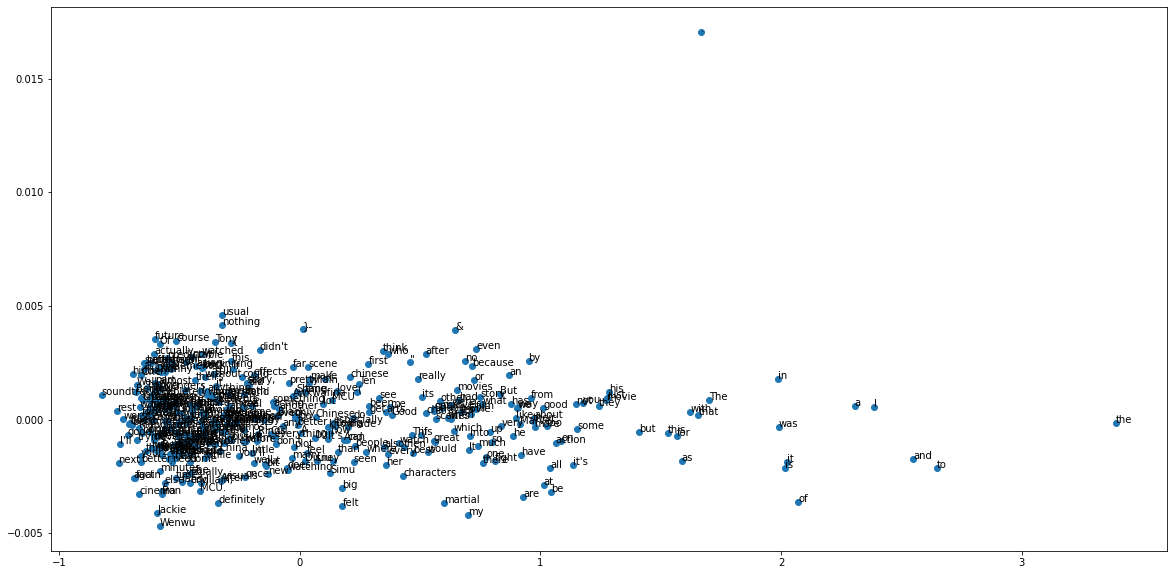

In [41]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# fit a 2d PCA model to the vectors
from sklearn.decomposition import PCA

X = model2[model2.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
import matplotlib.pyplot as plt
plt.figure (figsize = (20,10))
plt.scatter(result[:, 0], result[:, 1])
words = list(model2.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file



# Link:
https://github.com/SANDEEOPP/INFO-5731-Section-020---Computational-Methods-for-Information-Systems-Fall-2022-/blob/main/Assignment3_dataset.csv



